**Project Task: Week 1**

*Class Imbalance Problem:* 
1. Perform an EDA on the dataset.

 a) See what a positive, negative, and neutral review looks like.

 b) Check the class count for each class. It’s a class imbalance problem.

2. Convert the reviews in Tf-Idf score. 

3. Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance. 

**Project Task: Week 2**

*Tackling Class Imbalance Problem:* 
1. Oversampling or undersampling can be used to tackle the class imbalance problem. 

2. In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project. 

3. Use Tree-based classifiers like Random Forest and XGBoost. Note: Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class. 

**Project Task: Week 3** 

*Model Selection:* 
1. Apply multi-class SVM’s and neural nets. 

2. Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.

3. Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same. 

**Project Task: Week 4** 

*Applying LSTM:* 
1. Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.) Hint: Another variation of LSTM, GRU (Gated Recurrent Units) can be tried as well. 

2. Compare the accuracy of neural nets with traditional ML based algorithms. 

3. Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive, negative, and neutral. Hint: Use techniques like Grid Search, Cross-Validation and Random Search 

**Optional Tasks: Week 4**

*Topic Modelling:* 
1. Cluster similar reviews. Note: Some reviews may talk about the device as a gift-option. Other reviews may be about product looks and some may highlight about its battery and performance. Try naming the clusters. 

2. Perform Topic Modelling Hint: Use scikit-learn provided Latent Dirchlette Allocation (LDA) and Non-Negative Matrix Factorization (NMF).

A snapshot of the dataset
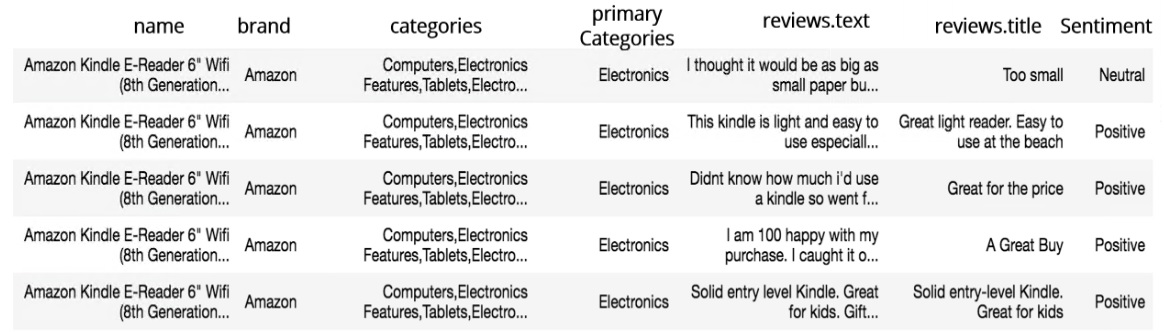

# **WEEK 1**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
import nltk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

print("Setup Complete")

Setup Complete


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.pipeline import Pipeline

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
from keras import layers

print("Setup Complete")

Setup Complete


In [4]:
#Uncomment if using google colab, to upload files
'''
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
'''

Saving test_data.csv to test_data.csv
Saving test_data_hidden.csv to test_data_hidden.csv
Saving train_data.csv to train_data.csv
User uploaded file "test_data.csv" with length 519747 bytes
User uploaded file "test_data_hidden.csv" with length 528718 bytes
User uploaded file "train_data.csv" with length 2074490 bytes


In [5]:
# Load the data
import pandas as pd
data = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
test_hidden = pd.read_csv('test_data_hidden.csv')

In [6]:
data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [7]:
test_hidden.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [8]:
data.shape

(4000, 8)

In [9]:
test.shape

(1000, 7)

In [10]:
test_hidden.shape

(1000, 8)

In [11]:
data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [12]:
Positive = data[data['sentiment']== "Positive"]
Neutral = data[data['sentiment']== "Neutral"]
Negative = data[data['sentiment']== "Negative"]

In [13]:
Positive['sentiment'].value_counts()

Positive    3749
Name: sentiment, dtype: int64

In [14]:
Neutral['sentiment'].value_counts()

Neutral    158
Name: sentiment, dtype: int64

In [15]:
Negative['sentiment'].value_counts()

Negative    93
Name: sentiment, dtype: int64

**Train Data** : Converting the Reviews as Tf-Idf Score

In [16]:
# Keeping only those Features that we need for further exploring.
data1 = data [["sentiment","reviews.text"]]
test_hidden1 = test_hidden [["sentiment","reviews.text"]]

In [17]:
data1.head()

,sentiment,reviews.text
0,Positive,Purchased on Black FridayPros - Great Price (e...
1,Positive,I purchased two Amazon in Echo Plus and two do...
2,Neutral,Just an average Alexa option. Does show a few ...
3,Positive,"very good product. Exactly what I wanted, and ..."
4,Positive,This is the 3rd one I've purchased. I've bough...


In [18]:
# Resetting the Index.
data1.index = pd.Series(list(range(data1.shape[0])))
test_hidden1.index = pd.Series(list(range(test_hidden1.shape[0])))

In [19]:
print('Shape : ',data1.shape)
data1.head()

Shape :  (4000, 2)


,sentiment,reviews.text
0,Positive,Purchased on Black FridayPros - Great Price (e...
1,Positive,I purchased two Amazon in Echo Plus and two do...
2,Neutral,Just an average Alexa option. Does show a few ...
3,Positive,"very good product. Exactly what I wanted, and ..."
4,Positive,This is the 3rd one I've purchased. I've bough...


Creating Preprocessing Function & Applying it on the Data

In [20]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#Download Stopwords
nltk.download('stopwords')

wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))

def preprocess(document):
    document = document.lower() # Convert to lowercase
    words = tokenizer.tokenize(document) # Tokenize
    words = [w for w in words if not w in stop_words] # Removing stopwords
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

print("Setup Complete")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Setup Complete


In [21]:
data1['Processed_Review'] = data1['reviews.text'].apply(preprocess)
test_hidden1['Processed_Review'] = test_hidden1['reviews.text'].apply(preprocess)
data1.head()

,sentiment,reviews.text,Processed_Review
0,Positive,Purchased on Black FridayPros - Great Price (e...,purchase black fridaypros great price even sal...
1,Positive,I purchased two Amazon in Echo Plus and two do...,purchase two amazon echo plus two dot plus fou...
2,Neutral,Just an average Alexa option. Does show a few ...,average alexa option show thing screen still l...
3,Positive,"very good product. Exactly what I wanted, and ...",good product exactly want good price
4,Positive,This is the 3rd one I've purchased. I've bough...,rd one purchase buy one niece case compare one...


In [22]:
data2 = data1 [["sentiment","Processed_Review"]]
test_hidden2 = test_hidden1 [["sentiment","Processed_Review"]]
data2.head()

,sentiment,Processed_Review
0,Positive,purchase black fridaypros great price even sal...
1,Positive,purchase two amazon echo plus two dot plus fou...
2,Neutral,average alexa option show thing screen still l...
3,Positive,good product exactly want good price
4,Positive,rd one purchase buy one niece case compare one...


**Creating TF-IDF Matrix & Multinomial Naive Bayes Classifier**

In [23]:
def textPreprocessing(data2):
    #Remove Punctuation Logic
    import string
    removePunctuation = [char for char in data2 if char not in string.punctuation]
    #Join Chars to form sentences
    sentenceWithoutPunctuations = ''.join(removePunctuation)
    words = sentenceWithoutPunctuations.split()
    #StopwordRemoval
    from nltk.corpus import stopwords
    removeStopwords = [word for word in words if word.lower() not in stopwords.words('english')]
    
    return removeStopwords

In [24]:
data2.groupby('sentiment').describe()

Processed_Review  ...     
                     count  ... freq
sentiment                   ...     
Negative                93  ...    3
Neutral                158  ...    2
Positive              3749  ...    4

[3 rows x 4 columns]

In [25]:
#Text preprocessing
data2['Processed_Review'].head(2).apply(textPreprocessing)
test_hidden2['Processed_Review'].head(2).apply(textPreprocessing)

0    [amazon, kindle, fire, lot, free, app, use, on...
1    [echo, show, great, addition, amazon, family, ...
Name: Processed_Review, dtype: object

Sklearn Package CountVectorizer (For creating Bag of Words)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(analyzer=textPreprocessing).fit(data2['Processed_Review'])
bow_hiddden = CountVectorizer(analyzer=textPreprocessing).fit(test_hidden2['Processed_Review'])

In [27]:
len(bow.vocabulary_)

3407

In [28]:
reviews_bow = bow.transform(data2['Processed_Review'])

Tf-Idf

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfData = TfidfTransformer().fit(reviews_bow)
tfidfDataFinal = tfidfData.transform(reviews_bow)

In [30]:
tfidfDataFinal.shape

(4000, 3407)

The data is all set for Model Building!

1.   Model Training - NaiveBayes Algorithm
2.   String Data Handling - MultinomialNB

In [31]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(tfidfDataFinal,data2['sentiment'])

In [32]:
model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
inputData = "useless product"
l1 = textPreprocessing(inputData)
l2 = bow.transform(l1)
l3 = tfidfData.transform(l2)
prediction = model.predict(l3[0])
prediction

array(['Positive'], dtype='<U8')

**Observation**

> After running Multinomial Naive Bayes Classifier Everything is classified as positive because of the class imbalance as seen above.

Tackling Class Imbalance Problem:

In [34]:
#Creating independent and Dependent Features for train data
columns = data2.columns.tolist()
# Filtering the columns to remove data we do not want 
columns = [c for c in columns if c not in ["sentiment"]]
# Store the variable we are predicting 
target = "sentiment"
# Defining a random state 
state = np.random.RandomState(42)
X = data2[columns]
Y = data2[target]
# Printing the shapes of X & Y
print(X.shape)
print(Y.shape)

(4000, 1)
(4000,)


In [35]:
#Creating independent and Dependent Features for test_hidden data
columns = test_hidden2.columns.tolist()
# Filtering the columns to remove data we do not want 
columns = [c for c in columns if c not in ["sentiment"]]
# Store the variable we are predicting 
target = "sentiment"
# Defining a random state 
state = np.random.RandomState(42)
X_hidden = test_hidden2[columns]
Y_hidden = test_hidden2[target]
# Printing the shapes of X & Y
print(X_hidden.shape)
print(Y_hidden.shape)

(1000, 1)
(1000,)


In [36]:
print(data2.sentiment.value_counts())

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64


Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64


Text(0.5, 1.0, 'Distribution of Reviews Sentiment')

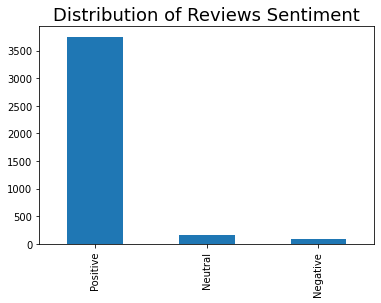

In [37]:
# Using Matplotlib to show distribution of reviews sentiment in the train dataset
print(data1.sentiment.value_counts())
data1['sentiment'].value_counts().plot(kind='bar')
plt.title("Distribution of Reviews Sentiment", size=18)

Positive    937
Neutral      39
Negative     24
Name: sentiment, dtype: int64


Text(0.5, 1.0, 'Distribution of Reviews Sentiment')

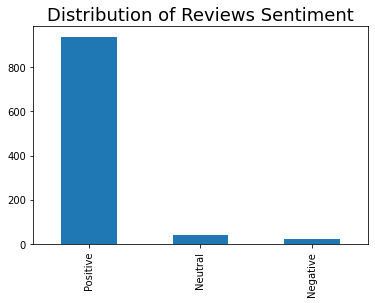

In [38]:
# Using Matplotlib to show distribution of reviews sentiment in the test hidden dataset
print(test_hidden1.sentiment.value_counts())
test_hidden1['sentiment'].value_counts().plot(kind='bar')
plt.title("Distribution of Reviews Sentiment", size=18)

In [39]:
print(Positive.shape,Neutral.shape,Negative.shape)

(3749, 8) (158, 8) (93, 8)


**Observation**
>There is class imbalance situation both in train data as well as test hidden datasets.

# **WEEK 2**

**Train Data/Test data hidden** : Applying Over Sampling

In [40]:
# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0) 
ros_hidden = RandomOverSampler(random_state=0) 
X_res,Y_res=ros.fit_sample(X,Y)
X_res_hidden,Y_res_hidden=ros_hidden.fit_sample(X_hidden,Y_hidden)

In [41]:
from collections import Counter
print(sorted(Counter(Y_res).items()))

[('Negative', 3749), ('Neutral', 3749), ('Positive', 3749)]


In [42]:
X_res.shape,Y_res.shape

((11247, 1), (11247,))

In [43]:
#Checking out both old & new data
print('Original dataset shape train {}'.format(Counter(Y)))
print('Resampled dataset shape train {}'.format(Counter(Y_res)))
print('Original dataset shape test_hidden {}'.format(Counter(Y_hidden)))
print('Resampled dataset shape test_hidden {}'.format(Counter(Y_res_hidden)))

Original dataset shape train Counter({'Positive': 3749, 'Neutral': 158, 'Negative': 93})
Resampled dataset shape train Counter({'Positive': 3749, 'Neutral': 3749, 'Negative': 3749})
Original dataset shape test_hidden Counter({'Positive': 937, 'Neutral': 39, 'Negative': 24})
Resampled dataset shape test_hidden Counter({'Positive': 937, 'Negative': 937, 'Neutral': 937})


In [44]:
#Creating X output to dataframe
X1=pd.DataFrame(X_res,columns=['Processed_Review'])
X2=pd.DataFrame(X_res_hidden,columns=['Processed_Review'])

In [45]:
#Creating Y output to dataframe for merging
Y1=pd.DataFrame(Y_res,columns=['sentiment'])
Y2=pd.DataFrame(Y_res_hidden,columns=['sentiment'])

In [46]:
#Merging the X & Y output to Final data
oversample_train=pd.concat([X1,Y1],axis=1)
oversample_train.head()

,Processed_Review,sentiment
0,purchase black fridaypros great price even sal...,Positive
1,purchase two amazon echo plus two dot plus fou...,Positive
2,average alexa option show thing screen still l...,Neutral
3,good product exactly want good price,Positive
4,rd one purchase buy one niece case compare one...,Positive


In [47]:
oversample_testhidden=pd.concat([X2,Y2],axis=1)
oversample_testhidden.head()

,Processed_Review,sentiment
0,amazon kindle fire lot free app use one want g...,Positive
1,echo show great addition amazon family work li...,Positive
2,great value best buy buy christmas sale,Positive
3,use mine email facebook game go line also load...,Positive
4,fantastic item person buy love,Positive


In [48]:
oversample_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11247 entries, 0 to 11246
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Processed_Review  11247 non-null  object
 1   sentiment         11247 non-null  object
dtypes: object(2)
memory usage: 175.9+ KB


In [49]:
oversample_testhidden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Processed_Review  2811 non-null   object
 1   sentiment         2811 non-null   object
dtypes: object(2)
memory usage: 44.0+ KB


In [50]:
#Merged dataframe
oversample_merged = pd.concat([oversample_train, oversample_testhidden])

Negative    4686
Positive    4686
Neutral     4686
Name: sentiment, dtype: int64


Text(0.5, 1.0, 'Distribution of Reviews Sentiment')

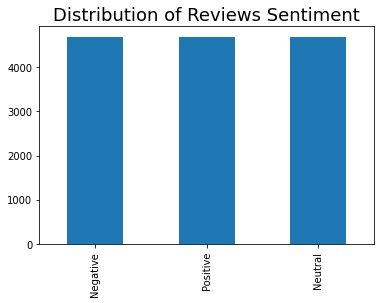

In [51]:
# Using Matplotlib to plot the final data & show distribution of reviews sentiment in the dataset
print(oversample_merged.sentiment.value_counts())
oversample_merged['sentiment'].value_counts().plot(kind='bar')
plt.title("Distribution of Reviews Sentiment", size=18)

In [52]:
print(oversample_merged.shape)

(14058, 2)


In [53]:
# Dropping missing values
oversample_merged.dropna(inplace=True)

oversample_merged.head()

,Processed_Review,sentiment
0,purchase black fridaypros great price even sal...,Positive
1,purchase two amazon echo plus two dot plus fou...,Positive
2,average alexa option show thing screen still l...,Neutral
3,good product exactly want good price,Positive
4,rd one purchase buy one niece case compare one...,Positive


In [54]:
print(oversample_merged.shape)

(14058, 2)


**Observation**
>Data is suprisingly clean, no null values found

**Train Data/Test data hidden** : Applying Under Sampling

In [55]:
# example of random undersampling to balance the class distribution
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
rus_hidden = RandomUnderSampler(random_state=0)
X_res,Y_res=rus.fit_sample(X,Y)
X_res_hidden,Y_res_hidden=rus_hidden.fit_sample(X_hidden,Y_hidden)

In [56]:
from collections import Counter
print(sorted(Counter(Y_res).items()))

[('Negative', 93), ('Neutral', 93), ('Positive', 93)]


In [57]:
X_res.shape,Y_res.shape

((279, 1), (279,))

In [58]:
#Creating X output to dataframe
X1=pd.DataFrame(X_res,columns=['Processed_Review'])
X2=pd.DataFrame(X_res_hidden,columns=['Processed_Review'])
#Creating Y output to dataframe for merging
Y1=pd.DataFrame(Y_res,columns=['sentiment'])
Y2=pd.DataFrame(Y_res_hidden,columns=['sentiment'])
#Merging the X & Y output to Final data
undersample_train=pd.concat([X1,Y1],axis=1)
undersample_testhidden=pd.concat([X2,Y2],axis=1)
undersample_train.head()

,Processed_Review,sentiment
0,cheap run chrome stuff return store,Negative
1,worthless except regular echo poor excuse vide...,Negative
2,bad amazon turn tablet big advertise tool many...,Negative
3,buy kindle year old grand daughter buy warrant...,Negative
4,read positive review wish could say best buy g...,Negative


In [59]:
#Merged dataframe
undersample_merged = pd.concat([undersample_train, undersample_testhidden])

Negative    117
Neutral     117
Positive    117
Name: sentiment, dtype: int64


Text(0.5, 1.0, 'Distribution of Reviews Sentiment')

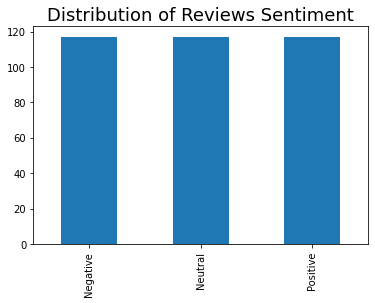

In [60]:
# Using Matplotlib to plot the final data & show distribution of reviews sentiment in the dataset
print(undersample_merged.sentiment.value_counts())
undersample_merged['sentiment'].value_counts().plot(kind='bar')
plt.title("Distribution of Reviews Sentiment", size=18)

In [61]:
# Dropping missing values
undersample_merged.dropna(inplace=True)

undersample_merged.head()

,Processed_Review,sentiment
0,cheap run chrome stuff return store,Negative
1,worthless except regular echo poor excuse vide...,Negative
2,bad amazon turn tablet big advertise tool many...,Negative
3,buy kindle year old grand daughter buy warrant...,Negative
4,read positive review wish could say best buy g...,Negative


**Train & Test Split Data**

In [62]:
# Splitting data into training set and validation
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(oversample_merged['Processed_Review'], oversample_merged['sentiment'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train_os.shape[0],X_test_os.shape[0]))
print('Show a review in the training set : \n', X_train_os.iloc[10])

Load 12652 training examples and 1406 validation examples. 

Show a review in the training set : 
 serf every function need tablet price right


In [63]:
# Splitting data into training set and validation
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(undersample_merged['Processed_Review'], undersample_merged['sentiment'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train_us.shape[0],X_test_us.shape[0]))
print('Show a review in the training set : \n', X_train_us.iloc[10])

Load 315 training examples and 36 validation examples. 

Show a review in the training set : 
 sideload google play service able download google play store use google chrome web browser tablet design exclusive amazon


***Text Preprocessing***

Text preprocessing is required to clean the data of all noise. Following preprocessing steps are used to clean the raw data.

1.   BeautifulSoup library is used to remove html tags, non characters
2.   Then it was converted to lower case
3.   Stopwords were removed
4.   Stemming was done using SnowballStemmer

In [64]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [65]:
# Preprocess text data in training set and validation set
X_train_cleaned_os = []
X_test_cleaned_os = []

for d in X_train_os:
    X_train_cleaned_os.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned_os[10])
    
for d in X_test_os:
    X_test_cleaned_os.append(cleanText(d))

Show a cleaned review in the training set : 
 serf every function need tablet price right


In [66]:
# Preprocess text data in training set and validation set
X_train_cleaned_us = []
X_test_cleaned_us = []

for d in X_train_us:
    X_train_cleaned_us.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned_us[10])
    
for d in X_test_us:
    X_test_cleaned_us.append(cleanText(d))

Show a cleaned review in the training set : 
 sideload google play service able download google play store use google chrome web browser tablet design exclusive amazon


**XGBoost** is an advanced version of gradient boosting. It means extreme gradient boosting. Boosting falls under the category of the distributed machine learning community. XGBoost is a more advanced version of the gradient boosting method. 

Applying XGBoost on oversampled merged data

In [67]:
# XGBoost
from xgboost import XGBClassifier

The text must be parsed to remove words, called **tokenization**. Then the words need to be encoded as integers or floating point values for use as input to a machine learning algorithm, called feature extraction (or vectorization).

A simple and effective model for thinking about text documents in machine learning is called the **B**ag-**o**f-**W**ords Model, or **BoW**. The model is simple in that it throws away all of the order information in the words and focuses on the occurrence of words in a document. This can be done by assigning each word a unique number. Then any document we see can be encoded as a fixed-length vector with the length of the vocabulary of known words. The value in each position in the vector could be filled with a count or frequency of each word in the encoded document.

Tf-Idf calculates how important a word is in the document. TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents.

In [68]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train_cleaned_os)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1592
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train_tfidf, y_train_os)

Number of features : 1592 

Show some feature names : 
 ['ability', 'patience']


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
# Evaluating on the validaton set
predictions = xgb.predict(tfidf.transform(X_test_cleaned_os))
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_os, predictions)))
print("\nClassification report : \n", metrics.classification_report(y_test_os, predictions))
print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test_os, predictions))


Accuracy on validation set: 0.9040

Classification report : 
               precision    recall  f1-score   support

    Negative       0.90      1.00      0.95       475
     Neutral       0.88      0.92      0.90       463
    Positive       0.94      0.79      0.86       468

    accuracy                           0.90      1406
   macro avg       0.91      0.90      0.90      1406
weighted avg       0.91      0.90      0.90      1406


Confusion Matrix : 
 [[474   0   1]
 [ 14 425  24]
 [ 37  59 372]]


Applying XGBoost on undersampled merged data

In [70]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train_cleaned_us)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #254
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train_tfidf, y_train_us)

Number of features : 254 

Show some feature names : 
 ['able']


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [71]:
# Evaluating on the validaton set
predictions = xgb.predict(tfidf.transform(X_test_cleaned_us))
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_us, predictions)))
print("\nClassification report : \n", metrics.classification_report(y_test_us, predictions))
print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test_us, predictions))


Accuracy on validation set: 0.6667

Classification report : 
               precision    recall  f1-score   support

    Negative       0.69      0.60      0.64        15
     Neutral       0.50      0.78      0.61         9
    Positive       0.89      0.67      0.76        12

    accuracy                           0.67        36
   macro avg       0.69      0.68      0.67        36
weighted avg       0.71      0.67      0.67        36


Confusion Matrix : 
 [[9 5 1]
 [2 7 0]
 [2 2 8]]


**Observation**
> Oversampled XGboost model yeilds superior results as compared to undersampled XGBoost model

**Word Embedding** is a language modeling technique used for mapping words to vectors of real numbers. It represents words or phrases in vector space with several dimensions.

**Word2Vec** consists of models for generating word embedding. These models are shallow two layer neural networks having one input layer, one hidden layer and one output layer. 

Word2vec can utilize either of two model architectures to produce a distributed representation of words: continuous bag-of-words (CBOW) or continuous skip-gram.

The we will feed the word vectores to Random Forest Classifier. To do that follwowing steps will be followed

1.   Convert review text to sentences
2.   Create vocabulary list using Word2Vec model.
3.   Transform each review into numerical representation by computing average feature vectors of words 
4.   Fit the average feature vectors to Random Forest Classifier

In [72]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Define a function to split a review into parsed sentences

In [73]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences

In [74]:
# Parsing each review in the training set into sentences
sentences_os = []
for review in X_train_cleaned_os:
    sentences_os += parseSent(review, tokenizer)
    
print('%d parsed sentence in the training set\n'  %len(sentences_os))
print('Show a parsed sentence in the training set : \n',  sentences_os[10])

12652 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['serf', 'every', 'function', 'need', 'tablet', 'price', 'right']


In [75]:
# Parsing each review in the training set into sentences
sentences_us = []
for review in X_train_cleaned_us:
    sentences_us += parseSent(review, tokenizer)
    
print('%d parsed sentence in the training set\n'  %len(sentences_us))
print('Show a parsed sentence in the training set : \n',  sentences_us[10])

315 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['sideload', 'google', 'play', 'service', 'able', 'download', 'google', 'play', 'store', 'use', 'google', 'chrome', 'web', 'browser', 'tablet', 'design', 'exclusive', 'amazon']


In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
level=logging.INFO)

In [76]:
# Fitting parsed sentences to Word2Vec model 

num_features = 300  #embedding dimension                     
min_word_count = 10 #Minimum word count                
num_workers = 4 #Number of threads to run in parallel      
context = 10   #Context window size                                                                                       
downsampling = 1e-3 #Downsample setting for frequent words

print("Training Word2Vec model ...\n")
w2v_os = Word2Vec(sentences_os, workers=num_workers, size=num_features, min_count = min_word_count,\
                 window = context, sample = downsampling)
w2v_os.init_sims(replace=True)
w2v_os.save("w2v_300features_10minwordcounts_10context") 

print("Number of words in the vocabulary list : %d \n" %len(w2v_os.wv.index2word)) 
print("Show first 10 words in the vocabulary list  vocabulary list: \n", w2v_os.wv.index2word[0:10])

Training Word2Vec model ...

Number of words in the vocabulary list : 1358 

Show first 10 words in the vocabulary list  vocabulary list: 
 ['tablet', 'buy', 'use', 'good', 'work', 'amazon', 'great', 'get', 'one', 'kindle']


In [77]:
# Fitting parsed sentences to Word2Vec model 

num_features = 300  #embedding dimension                     
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 

print("Training Word2Vec model ...\n")
w2v_us = Word2Vec(sentences_us, workers=num_workers, size=num_features, min_count = min_word_count,\
                 window = context, sample = downsampling)
w2v_us.init_sims(replace=True)
w2v_us.save("w2v_300features_10minwordcounts_10context") #save trained word2vec model

print("Number of words in the vocabulary list : %d \n" %len(w2v_us.wv.index2word)) 
print("Show first 10 words in the vocabulary list  vocabulary list: \n", w2v_us.wv.index2word[0:10])

Training Word2Vec model ...

Number of words in the vocabulary list : 125 

Show first 10 words in the vocabulary list  vocabulary list: 
 ['tablet', 'buy', 'use', 'good', 'great', 'work', 'amazon', 'love', 'one', 'get']


***Averaging Feature Vectors***

Now we have created a vocabulary list of words with each word having a word representation(ie. feature vector of dim 300).

To find a numerical representation for a review, we run through each word in a review text. For words appear in the vocabulary list, we compute the average feature vectors of all those words. The average feature vector is the numerical represenation of the review.

In [78]:
# Transfroming the training data into feature vectors

def makeFeatureVec(review, model, num_features):
    # Function to average all of the word vectors in a given
    # paragraph
    #
    # Pre-initialize an empty numpy array 
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word) #Index2word is a list that contains the names of the words in the model's vocabulary. 
    isZeroVec = True
    # Loop over each word in the review and, if it is in the model's vocaublary, add its feature vector to the total
    for word in review:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
            isZeroVec = False
    # Divide the result by the number of words to get the average
    if isZeroVec == False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    # Given a set of reviews (each one a list of words), calculate the average feature vector for each one and return a 2D numpy array
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,num_features)
        counter = counter + 1        
    return reviewFeatureVecs

In [79]:
# Getting feature vectors for training set
X_train_cleaned_os_v = []
for review in X_train_os:
    X_train_cleaned_os_v.append(cleanText(review, remove_stopwords=True, split_text=True))
trainVector = getAvgFeatureVecs(X_train_cleaned_os_v, w2v_os, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector.shape)


# Getting feature vectors for validation set
X_test_cleaned_os_v = []
for review in X_test_os:
    X_test_cleaned_os_v.append(cleanText(review, remove_stopwords=True, split_text=True))
testVector = getAvgFeatureVecs(X_test_cleaned_os_v, w2v_os, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector.shape)

Training set : 12652 feature vectors with 300 dimensions
Validation set : 1406 feature vectors with 300 dimensions


In [80]:
# Getting feature vectors for training set
X_train_cleaned_us_v = []
for review in X_train_us:
    X_train_cleaned_us_v.append(cleanText(review, remove_stopwords=True, split_text=True))
trainVector1 = getAvgFeatureVecs(X_train_cleaned_us_v, w2v_us, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector1.shape)


# Getting feature vectors for validation set
X_test_cleaned_us_v = []
for review in X_test_us:
    X_test_cleaned_us_v.append(cleanText(review, remove_stopwords=True, split_text=True))
testVector1 = getAvgFeatureVecs(X_test_cleaned_us_v, w2v_us, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector1.shape)

Training set : 315 feature vectors with 300 dimensions
Validation set : 36 feature vectors with 300 dimensions


***Random Forest Classifer***

We will now train the Random Forest Classifier using feature vectors of reviews in the training set.

Applying random forest classifier on oversampled merged data

In [81]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(trainVector, y_train_os)
predictions = rf.predict(testVector)

In [82]:
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_os, predictions)))
print("\nClassification report : \n", metrics.classification_report(y_test_os, predictions))
print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test_os, predictions))


Accuracy on validation set: 1.0000

Classification report : 
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       475
     Neutral       1.00      1.00      1.00       463
    Positive       1.00      1.00      1.00       468

    accuracy                           1.00      1406
   macro avg       1.00      1.00      1.00      1406
weighted avg       1.00      1.00      1.00      1406


Confusion Matrix : 
 [[475   0   0]
 [  0 463   0]
 [  0   0 468]]


Applying random forest classifier on undersampled merged data

In [83]:
# Random Forest Classifier
rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(trainVector1, y_train_us)
predictions1 = rf1.predict(testVector1)

In [84]:
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_us, predictions1)))
print("\nClassification report : \n", metrics.classification_report(y_test_us, predictions1))
print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test_us, predictions1))


Accuracy on validation set: 0.5000

Classification report : 
               precision    recall  f1-score   support

    Negative       0.62      0.53      0.57        15
     Neutral       0.31      0.56      0.40         9
    Positive       0.71      0.42      0.53        12

    accuracy                           0.50        36
   macro avg       0.55      0.50      0.50        36
weighted avg       0.57      0.50      0.51        36


Confusion Matrix : 
 [[8 6 1]
 [3 5 1]
 [2 5 5]]


**Observation**
>Oversampled random forest generated better model than undersampled random forest.

**Observation**
>Oversampled random forest generates better model than oversampled XGBoost

# **WEEK 3**

**TfidfVectorizer with Linear SVM by using SGD**

Some words might appear quite frequently but have a very less or negligible meaningful information about the sentiment for a particular review. Instead of using occurance counting we will use tf-idf transform to scale down the impact of frequently appearing words in a given corpus.

In sklearn library we will use TfidfVectorizer which implements both tokenization and tf-idf weighted counting in a single class.

We will continue with oversampled data.

In [85]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train_os)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

# SVM
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train_tfidf, y_train_os)

Number of features : 1592 

Show some feature names : 
 ['ability', 'patience']


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [86]:
# Have a look at the top 10 features with the smallest and largest coefficients
feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = clf.coef_[0].argsort()
print('\nTop 10 features with the smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with the largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with the smallest coefficients :
['easy' 'great' 'well' 'love' 'sometimes' 'read' 'alexa' 'hd' 'far'
 'price']

Top 10 features with the largest coefficients : 
['return' 'terrible' 'powerful' 'minute' 'exchange' 'bad' 'give' 'update'
 'useless' 'schedule']


In [87]:
# Evaluating on the validaton set
predictions = clf.predict(tfidf.transform(X_test_cleaned_os))

In [88]:
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_os, predictions)))
print("\nClassification report : \n", metrics.classification_report(y_test_os, predictions))
print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test_os, predictions))


Accuracy on validation set: 0.9808

Classification report : 
               precision    recall  f1-score   support

    Negative       0.99      1.00      1.00       475
     Neutral       0.96      0.99      0.98       463
    Positive       0.99      0.95      0.97       468

    accuracy                           0.98      1406
   macro avg       0.98      0.98      0.98      1406
weighted avg       0.98      0.98      0.98      1406


Confusion Matrix : 
 [[475   0   0]
 [  0 459   4]
 [  4  19 445]]


**CNN** : Using a deep neural network model

In [89]:
df_cnn = oversample_train.copy()

# Drop missing values
df_cnn.dropna(inplace=True)

# Convert the sentiments
df_cnn.sentiment.replace(('Positive','Negative','Neutral'),(1,0,2),inplace=True)

df_cnn.head()

,Processed_Review,sentiment
0,purchase black fridaypros great price even sal...,1
1,purchase two amazon echo plus two dot plus fou...,1
2,average alexa option show thing screen still l...,2
3,good product exactly want good price,1
4,rd one purchase buy one niece case compare one...,1


In [90]:
# Splitting data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(df_cnn['Processed_Review'], df_cnn['sentiment'], \
                                                    test_size=0.1, random_state=1)

In [91]:
top_words = 20000 
maxlen = 100 
batch_size = 32
nb_classes = 3
nb_epoch = 3


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #Considering only top 20000 words in the corpus
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# One-Hot Encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape) #(10122, 100)
print('X_test shape:', X_test_seq.shape) #(1125, 100)
print('y_train shape:', y_train_seq.shape) #(10122, 3)
print('y_test shape:', y_test_seq.shape) #(1125, 3)

X_train shape: (10122, 100)
X_test shape: (1125, 100)
y_train shape: (10122, 3)
y_test shape: (1125, 3)


In [92]:
model = Sequential()

model.add(Embedding(top_words, 128, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           82048     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 2,643,371
Trainable params: 2,643,371
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=10, verbose=1)

Epoch 1/10
317/317 [==============================] - 23s 73ms/step - loss: 0.2831 - accuracy: 0.8135
Epoch 2/10
317/317 [==============================] - 23s 72ms/step - loss: 0.0114 - accuracy: 0.9963
Epoch 3/10
317/317 [==============================] - 23s 71ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 4/10
317/317 [==============================] - 23s 72ms/step - loss: 5.3149e-04 - accuracy: 1.0000
Epoch 5/10
317/317 [==============================] - 23s 72ms/step - loss: 2.6959e-04 - accuracy: 1.0000
Epoch 6/10
317/317 [==============================] - 23s 71ms/step - loss: 1.6351e-04 - accuracy: 1.0000
Epoch 7/10
317/317 [==============================] - 23s 72ms/step - loss: 1.0618e-04 - accuracy: 1.0000
Epoch 8/10
317/317 [==============================] - 23s 72ms/step - loss: 7.1692e-05 - accuracy: 1.0000
Epoch 9/10
317/317 [==============================] - 23s 73ms/step - loss: 5.2445e-05 - accuracy: 1.0000
Epoch 10/10
317/317 [==============================] - 22s

In [94]:
score = model.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

36/36 [==============================] - 0s 11ms/step - loss: 0.0135 - accuracy: 0.9956
Test loss : 0.0135
Test accuracy : 0.9956


***CountVectorizer with Multinomial Naive Bayes (Benchmark Model)***

*   We will use CountVectorizer which implements both tokenization and occurrence counting in a single class provided by the Sklearn library. The output is a sparse matrix representation of the document.


In [95]:
# Fit and transform the training data to a document-term matrix using CountVectorizer
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_os)
print("Number of features : %d \n" %len(countVect.get_feature_names())) #6378 
print("Show some feature names : \n", countVect.get_feature_names()[::1000])


# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train_os)

Number of features : 3605 

Show some feature names : 
 ['abc', 'ecosphere', 'miracle', 'starter']


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [96]:
# Evaluate the model on validaton set
predictions = mnb.predict(countVect.transform(X_test_os))
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_os, predictions)))
print("\nClassification report : \n", metrics.classification_report(y_test_os, predictions))
print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test_os, predictions))


Accuracy on validation set: 0.9410

Classification report : 
               precision    recall  f1-score   support

    Negative       0.98      0.96      0.97       475
     Neutral       0.91      0.96      0.93       463
    Positive       0.94      0.91      0.92       468

    accuracy                           0.94      1406
   macro avg       0.94      0.94      0.94      1406
weighted avg       0.94      0.94      0.94      1406


Confusion Matrix : 
 [[455  11   9]
 [  3 443  17]
 [  8  35 425]]


**Ensemble Modelling**

Ensembling SVC and XGBoost as intructed in online class

In [97]:
from sklearn.ensemble import VotingClassifier

In [98]:
from sklearn.svm import SVC
svcclf = SVC(kernel='rbf', probability=True)

In [99]:
ensemble=VotingClassifier(estimators=[('svc', svcclf), ('XGBoost', xgb)], 
                       voting='soft', weights=[1,2]).fit(trainVector,y_train_os)
print('The accuracy for SVM and XGBoost is:',ensemble.score(testVector,y_test_os))

The accuracy for SVM and XGBoost is: 0.984352773826458


Since we got better results in Random Forest Classifier model in week 2, ensembling RF with SVC.

In [100]:
ensemble1=VotingClassifier(estimators=[('svc', svcclf), ('RF', rf)], 
                       voting='soft', weights=[1,2]).fit(trainVector,y_train_os)
print('The accuracy for SVM and Random Forest is:',ensemble1.score(testVector,y_test_os))

The accuracy for SVM and Random Forest is: 0.9971550497866287


**Observation**
>As expected, ensemble model with SVC + Random Forest has better accuracy.

**Feature Engineering**

In [101]:
oversample_merged_fe = oversample_merged.copy()

In [102]:
# Convert the sentiments
oversample_merged_fe.sentiment.replace(('Positive','Negative','Neutral'),(1,0,2),inplace=True)

In [103]:
oversample_merged_fe.head()

,Processed_Review,sentiment
0,purchase black fridaypros great price even sal...,1
1,purchase two amazon echo plus two dot plus fou...,1
2,average alexa option show thing screen still l...,2
3,good product exactly want good price,1
4,rd one purchase buy one niece case compare one...,1


In [104]:
print(oversample_merged_fe.shape)

(14058, 2)


Applying Random Forest in feature engineered data to look for insights.

In [105]:
# Splitting data into training set and validation
X_train_os_fe, X_test_os_fe, y_train_os_fe, y_test_os_fe = train_test_split(oversample_merged_fe['Processed_Review'], oversample_merged_fe['sentiment'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train_os_fe.shape[0],X_test_os_fe.shape[0]))
print('Show a review in the training set : \n', X_train_os_fe.iloc[10])

Load 12652 training examples and 1406 validation examples. 

Show a review in the training set : 
 serf every function need tablet price right


In [106]:
# Preprocess text data in training set and validation set
X_train_cleaned_os_fe = []
X_test_cleaned_os_fe = []

for d in X_train_os_fe:
    X_train_cleaned_os_fe.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned_os_fe[10])
    
for d in X_test_os_fe:
    X_test_cleaned_os_fe.append(cleanText(d))

Show a cleaned review in the training set : 
 serf every function need tablet price right


In [107]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences

In [108]:
# Parsing each review in the training set into sentences
sentences_os_fe = []
for review in X_train_cleaned_os_fe:
    sentences_os_fe += parseSent(review, tokenizer)
    
print('%d parsed sentence in the training set\n'  %len(sentences_os_fe))
print('Show a parsed sentence in the training set : \n',  sentences_os_fe[10])

12652 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['serf', 'every', 'function', 'need', 'tablet', 'price', 'right']


In [109]:
# Fitting parsed sentences to Word2Vec model 

num_features = 300                   
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 

print("Training Word2Vec model ...\n")
w2v_os_fe = Word2Vec(sentences_os_fe, workers=num_workers, size=num_features, min_count = min_word_count,\
                 window = context, sample = downsampling)
w2v_os_fe.init_sims(replace=True)
w2v_os_fe.save("w2v_300features_10minwordcounts_10context") #save trained word2vec model

print("Number of words in the vocabulary list : %d \n" %len(w2v_os_fe.wv.index2word)) #4016 
print("Show first 10 words in the vocabulary list  vocabulary list: \n", w2v_os_fe.wv.index2word[0:10])

Training Word2Vec model ...

Number of words in the vocabulary list : 1358 

Show first 10 words in the vocabulary list  vocabulary list: 
 ['tablet', 'buy', 'use', 'good', 'work', 'amazon', 'great', 'get', 'one', 'kindle']


In [110]:
# Getting feature vectors for training set
X_train_cleaned_os_fe = []
for review in X_train_os_fe:
    X_train_cleaned_os_fe.append(cleanText(review, remove_stopwords=True, split_text=True))
trainVector_fe = getAvgFeatureVecs(X_train_cleaned_os_fe, w2v_os_fe, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector_fe.shape)


# Getting feature vectors for validation set
X_test_cleaned_os_fe = []
for review in X_test_os_fe:
    X_test_cleaned_os_fe.append(cleanText(review, remove_stopwords=True, split_text=True))
testVector_fe = getAvgFeatureVecs(X_test_cleaned_os_fe, w2v_os_fe, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector_fe.shape)

Training set : 12652 feature vectors with 300 dimensions
Validation set : 1406 feature vectors with 300 dimensions


In [111]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
y_train_os_fe=y_train_os_fe.astype('int')
y_test_os_fe=y_test_os_fe.astype('int')
rf.fit(trainVector_fe, y_train_os_fe)
predictions = rf.predict(testVector_fe)

print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_os_fe, predictions)))
print("\nClassification report : \n", metrics.classification_report(y_test_os_fe, predictions))
print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test_os_fe, predictions))


Accuracy on validation set: 1.0000

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       475
           1       1.00      1.00      1.00       468
           2       1.00      1.00      1.00       463

    accuracy                           1.00      1406
   macro avg       1.00      1.00      1.00      1406
weighted avg       1.00      1.00      1.00      1406


Confusion Matrix : 
 [[475   0   0]
 [  0 468   0]
 [  0   0 463]]


**Observation**
>As expected not much improvement after feature enginnering. The initial random forest classifier is itself yeilding good results.

# **WEEK 4**

***Applying LSTM***

Long Short Term Memory(LSTM) Networks are a special kind of the Recurrent Neural Networks(RNN) capable of learning long-term dependencies. LSTM can be very useful in text mining problems as it involves dependencies in the sentences which can be caught in the "memory" of the LSTM.
Here, we will train a simple LSTM and LSTM with Word2Vec embedding for classifying the reviews into positive and negative sentiments using Keras library.

***Simple LSTM***

We need to preprocess the text data to 2D tensor before we begin fitting it into a simple LSTM. Firstly we will tokenize the corpus by considering only top words (top_words = 20000) and transforming reviews to numerical sequences using the trained tokenizer. Lastly we will make it sure that all the numerical sequences have the same length (maxlen=100) for modelling by truncating the long reviews and padding shorter reviews having zero values.

For constructing a simple LSTM, we will use embedding class in Keras to building up the first layer. This embedding layer converts numerical sequence of words into a word embedding. We should also note that the embedding class provides a convenient way to map discrete words into a continuous vector space but it doesn't take the semantic similarity of the words into account. The next layer is the LSTM layer with 128 memory units. Finally, we will use a dense output layer with a single neuron and a sigmoid activation function to make 0 or 1 prediction for the two classes (positive sentiment and negative sentiment). As it is a binary classification problem log loss is used as the loss function(binary_crossentropy in Keras). ADAM optimization algorithm will be used.

Here's the workflow in this part: -
1.   Prepare X_train and X_test to 2D tensor.
2.   Train a simple LSTM (embedding layer => LSTM layer => dense layer).
3.   Compile and fit the model using log loss function and ADAM optimizer.

In [ ]:
df_lstm = oversample_merged.copy()

# Drop missing values
df_lstm.dropna(inplace=True)

# Convert the sentiments
df_lstm.sentiment.replace(('Positive','Negative','Neutral'),(1,0,2),inplace=True)

df_lstm.head()

,Processed_Review,sentiment
0,purchase black fridaypros great price even sal...,1
1,purchase two amazon echo plus two dot plus fou...,1
2,average alexa option show thing screen still l...,2
3,good product exactly want good price,1
4,rd one purchase buy one niece case compare one...,1


In [ ]:
print(df_lstm.shape)

(14058, 2)


In [ ]:
# Splitting data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(df_lstm['Processed_Review'], df_lstm['sentiment'], \
                                                    test_size=0.1, random_state=1)

In [ ]:
top_words = 20000 
maxlen = 100 
batch_size = 32
nb_classes = 3
nb_epoch = 3


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #Considering only top 20000 words in the corpus
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# One-Hot Encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape) #(12652, 100)
print('X_test shape:', X_test_seq.shape) #(1406, 100)
print('y_train shape:', y_train_seq.shape) #(12652, 3)
print('y_test shape:', y_test_seq.shape) #(1406, 3)

X_train shape: (12652, 100)
X_test shape: (1406, 100)
y_train shape: (12652, 3)
y_test shape: (1406, 3)


In [ ]:
# Constructing a Simple LSTM
model1 = Sequential()
model1.add(Embedding(top_words, 128, dropout=0.2))
model1.add(LSTM(128, dropout_W=0.2, dropout_U=0.2)) 
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))
model1.summary()

# Compiling LSTM
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model1.fit(X_train_seq, y_train_seq, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1)

# Model Evaluation
score = model1.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 2,691,971
Trainable params: 2,691,971
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
12652/12652 [==============================] - 85s 7ms/step - loss: 0.1888 - accuracy: 0.9188
Epoch 2/3
12652/12652 [==============================] - 85s 7ms/step - loss: 0.0333 - accuracy: 0.9893
Epoch 3/3
1406/1406 [=============

In [ ]:
# Getting weight matrix of the embedding layer
model1.layers[0].get_weights()[0] # weight matrix of the embedding layer, word-by-dim matrix
print("Size of weight matrix in the embedding layer : ", \
      model1.layers[0].get_weights()[0].shape) #(20000, 128)

# Getting weight matrix of the hidden layer
print("Size of weight matrix in the hidden layer : ", \
      model1.layers[1].get_weights()[0].shape) #(128, 512)  weight dim of LSTM - w

# Getting weight matrix of the output layer
print("Size of weight matrix in the output layer : ", \
      model1.layers[2].get_weights()[0].shape) #(128, 2) weight dim of dense layer

Size of weight matrix in the embedding layer :  (20000, 128)
Size of weight matrix in the hidden layer :  (128, 512)
Size of weight matrix in the output layer :  (128, 3)


***LSTM with Word2Vec Embedding***

In the simple LSTM model constructed above, the embedding class in Keras comes in handy for converting the numerical sequence of words into a word embedding but it doesn't take the semantic similarity of the words into account. The model assigns random weights to the embedding layer and learn the embeddings by minimizing the global error of the network.

Instead of using random weights we will use pretrained word embeddings for initializing the weight of an embedding layer. Here, we will use the Word2Vec embedding trained in Part 4 for intializing the weights of embedding layer in LSTM.

1. Load pretrained word embedding model.
2. Construct embedding layer using embedding matrix as weights.
3. Train a LSTM with Word2Vec embedding (embedding layer => LSTM layer => dense layer).
4. Compile and fit the model using log loss function and ADAM optimizer.

In [ ]:
# Loading pretrained Word2Vec model
w2v = Word2Vec.load("w2v_300features_10minwordcounts_10context")


# Getting Word2Vec embedding matrix
embedding_matrix = w2v.wv.syn0  # embedding matrix, type = numpy.ndarray 
print("Shape of embedding matrix : ", embedding_matrix.shape) #(4016, 300) = (vocabulary size, embedding dimension)
# w2v.wv.syn0[0] #feature vector of the first word in the vocabulary list

2020-11-07 18:34:45,606 : INFO : loading Word2Vec object from w2v_300features_10minwordcounts_10context
2020-11-07 18:34:45,667 : INFO : loading wv recursively from w2v_300features_10minwordcounts_10context.wv.* with mmap=None
2020-11-07 18:34:45,668 : INFO : setting ignored attribute vectors_norm to None
2020-11-07 18:34:45,668 : INFO : loading vocabulary recursively from w2v_300features_10minwordcounts_10context.vocabulary.* with mmap=None
2020-11-07 18:34:45,669 : INFO : loading trainables recursively from w2v_300features_10minwordcounts_10context.trainables.* with mmap=None
2020-11-07 18:34:45,669 : INFO : setting ignored attribute cum_table to None
2020-11-07 18:34:45,670 : INFO : loaded w2v_300features_10minwordcounts_10context


Shape of embedding matrix :  (1358, 300)


In [ ]:
top_words = embedding_matrix.shape[0] 
maxlen = 100 
batch_size = 32
nb_classes = 3
nb_epoch = 3


# Vectorizing X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #Considering only top 20000 words in the corpus
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# One-Hot Encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape) #(27799, 100)
print('X_test shape:', X_test_seq.shape) #(3089, 100)
print('y_train shape:', y_train_seq.shape) #(27799, 2)
print('y_test shape:', y_test_seq.shape) #(3089, 2)

X_train shape: (12652, 100)
X_test shape: (1406, 100)
y_train shape: (12652, 3)
y_test shape: (1406, 3)


In [ ]:
# Constructing Word2Vec embedding layer
embedding_layer = Embedding(embedding_matrix.shape[0], #4016
                            embedding_matrix.shape[1], #300
                            weights=[embedding_matrix])


# Constructing LSTM with Word2Vec embedding
model2 = Sequential()
model2.add(embedding_layer)
model2.add(LSTM(128, dropout_W=0.2, dropout_U=0.2)) 
model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))
model2.summary()

# Compiling model
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.fit(X_train_seq, y_train_seq, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1)


# Model evaluation
score = model2.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 300)         407400    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 627,435
Trainable params: 627,435
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
12652/12652 [==============================] - 93s 7ms/step - loss: 0.1731 - accuracy: 0.9255
Epoch 2/3
12652/12652 [==============================] - 92s 7ms/step - loss: 0.0289 - accuracy: 0.9916
Epoch 3/3
1406/1406 [=================

In [ ]:
# Getting weight matrix of the embedding layer
print("Size of weight matrix in the embedding layer : ", \
      model2.layers[0].get_weights()[0].shape) #(20000, 128)

# Getting weight matrix of the hidden layer
print("Size of weight matrix in the hidden layer : ", \
      model2.layers[1].get_weights()[0].shape) #(128, 512)  weight dim of LSTM - w

# Getting weight matrix of the output layer
print("Size of weight matrix in the output layer : ", \
      model2.layers[2].get_weights()[0].shape) #(128, 2) weight dim of dense layer

Size of weight matrix in the embedding layer :  (1358, 300)
Size of weight matrix in the hidden layer :  (300, 512)
Size of weight matrix in the output layer :  (128, 3)


**Exploring GRU model**

In [ ]:
# Constructing Word2Vec embedding layer
embedding_layer = Embedding(embedding_matrix.shape[0], #4016
                            embedding_matrix.shape[1], #300
                            weights=[embedding_matrix])


# Constructing GRU with Word2Vec embedding
model3 = Sequential()
model3.add(embedding_layer)
model3.add(GRU(128, dropout_W=0.2, dropout_U=0.2)) 
model3.add(Dense(nb_classes))
model3.add(Activation('softmax'))
model3.summary()

# Compiling model
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model3.fit(X_train_seq, y_train_seq, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1)


# Model evaluation
score = model3.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 300)         407400    
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               164736    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 387       
_________________________________________________________________
activation_3 (Activation)    (None, 3)                 0         
Total params: 572,523
Trainable params: 572,523
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
12652/12652 [==============================] - 96s 8ms/step - loss: 0.2052 - accuracy: 0.9263
Epoch 2/3
12652/12652 [==============================] - 96s 8ms/step - loss: 0.0661 - accuracy: 0.9856
Epoch 3/3
1406/1406 [=================

***Optional Tasks: Topic Modelling***

*Latent Dirichlet Allocation(LDA)*

In [ ]:
import nltk
nltk.download('wordnet')

doc_complete = data2["Processed_Review"].tolist()
doc_clean = [cleanText(doc).split() for doc in doc_complete]

[nltk_data] Downloading package wordnet to /home/labsuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from gensim.corpora import Dictionary

In [ ]:
dictionary = Dictionary(doc_clean)
print(dictionary)

2020-11-07 18:45:23,238 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-11-07 18:45:23,371 : INFO : built Dictionary(3415 unique tokens: ['able', 'access', 'accomplish', 'ad', 'add']...) from 4000 documents (total 60189 corpus positions)


Dictionary(3415 unique tokens: ['able', 'access', 'accomplish', 'ad', 'add']...)


In [ ]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 3),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1)],
 [(6, 1),
  (26, 2),
  (34, 1),
  (35, 4),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 2),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1)],
 [(35, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 

In [ ]:
from gensim.models import LdaModel

In [ ]:
NUM_TOPICS = 9
ldamodel = LdaModel(doc_term_matrix, num_topics=NUM_TOPICS, id2word=dictionary, passes=30)

2020-11-07 18:45:46,094 : INFO : using symmetric alpha at 0.1111111111111111
2020-11-07 18:45:46,095 : INFO : using symmetric eta at 0.1111111111111111
2020-11-07 18:45:46,097 : INFO : using serial LDA version on this node
2020-11-07 18:45:46,171 : INFO : running online (multi-pass) LDA training, 9 topics, 30 passes over the supplied corpus of 4000 documents, updating model once every 2000 documents, evaluating perplexity every 4000 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-07 18:45:46,173 : INFO : PROGRESS: pass 0, at document #2000/4000
2020-11-07 18:45:47,107 : INFO : merging changes from 2000 documents into a model of 4000 documents
2020-11-07 18:45:47,111 : INFO : topic #6 (0.111): 0.025*"good" + 0.018*"love" + 0.014*"great" + 0.014*"play" + 0.013*"tablet" + 0.013*"get" + 0.013*"buy" + 0.012*"easy" + 0.011*"use" + 0.011*"like"
2020-11-07 18:45:47,112 : INFO : topic #1 (0.111): 0.051*"love" + 0.030*"tablet" + 0.024*"kindle" + 0.017*"read" + 0.015*"bo

In [ ]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.075*"easy" + 0.070*"use" + 0.041*"great" + 0.039*"set" + 0.025*"love" + 0.024*"work" + 0.021*"product" + 0.017*"fun" + 0.017*"kid" + 0.013*"well"')

(1, '0.071*"love" + 0.052*"kindle" + 0.027*"read" + 0.022*"buy" + 0.021*"easy" + 0.020*"light" + 0.018*"one" + 0.018*"much" + 0.015*"use" + 0.013*"gift"')

(2, '0.089*"great" + 0.051*"price" + 0.047*"tablet" + 0.039*"recommend" + 0.037*"product" + 0.034*"good" + 0.024*"buy" + 0.022*"would" + 0.022*"gift" + 0.018*"best"')

(3, '0.019*"read" + 0.018*"price" + 0.017*"battery" + 0.016*"need" + 0.016*"charge" + 0.012*"buy" + 0.012*"would" + 0.012*"kindle" + 0.011*"life" + 0.011*"long"')

(4, '0.043*"echo" + 0.026*"alexa" + 0.023*"show" + 0.020*"music" + 0.020*"great" + 0.018*"love" + 0.015*"home" + 0.015*"sound" + 0.014*"amazon" + 0.012*"device"')

(5, '0.043*"love" + 0.038*"tablet" + 0.038*"old" + 0.033*"year" + 0.030*"buy" + 0.026*"one" + 0.025*"game" + 0.020*"fire" + 0.018*"play" + 0.017*"kindle"')

(6, '0.026*"tablet" + 0.025*"good" 

In [ ]:
word_dict = {}
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [ ]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,easy,love,great,read,echo,love,tablet,buy,book
1,use,kindle,price,price,alexa,tablet,good,use,use
2,great,read,tablet,battery,show,old,amazon,learn,read
3,set,buy,recommend,need,music,year,apps,enjoy,tablet
4,love,easy,product,charge,great,buy,kid,get,amazon
5,work,light,good,buy,love,one,get,one,apps
6,product,one,buy,would,home,game,play,tablet,great
7,fun,much,would,kindle,sound,fire,buy,easy,device
8,kid,use,gift,life,amazon,play,great,family,download
9,well,gift,best,long,device,kindle,go,child,like


In [ ]:
ldamodel.show_topic(0, topn = 20)

[('easy', 0.074667245),
 ('use', 0.07032422),
 ('great', 0.040676475),
 ('set', 0.038782477),
 ('love', 0.025304623),
 ('work', 0.023664776),
 ('product', 0.021125637),
 ('fun', 0.017288066),
 ('kid', 0.016985094),
 ('well', 0.013499372),
 ('lot', 0.0127475625),
 ('thing', 0.010588943),
 ('control', 0.010345111),
 ('item', 0.009317785),
 ('alexa', 0.008855828),
 ('good', 0.008744338),
 ('tablet', 0.008509769),
 ('time', 0.008021503),
 ('light', 0.007846481),
 ('setup', 0.0075428137)]

In [ ]:
!pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


In [ ]:
import pyLDAvis.gensim

***Displaying Results & Getting Insights***

In [ ]:
Lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False)
pyLDAvis.display(Lda_display)

***Creating a Wordcloud***

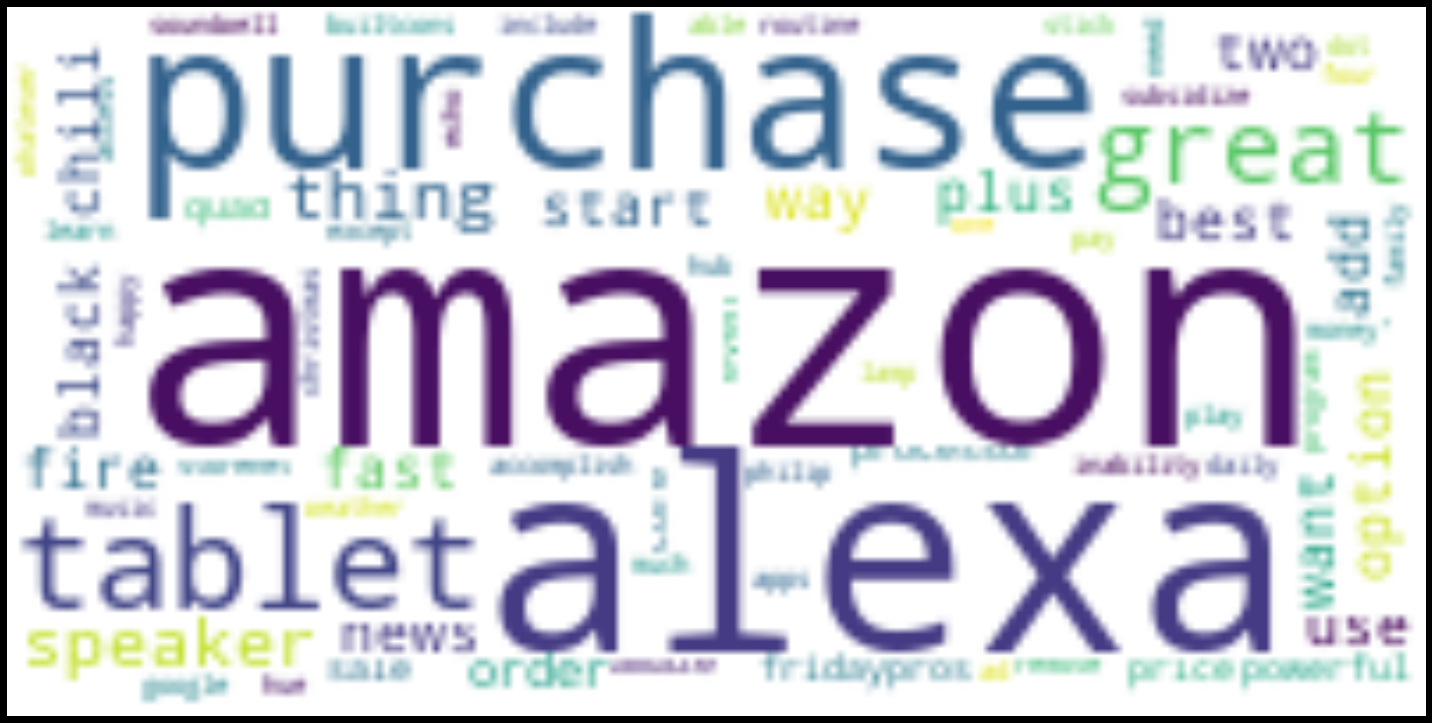

In [ ]:
from wordcloud import WordCloud, STOPWORDS
txt = data2["Processed_Review"].values
wc = WordCloud(width=200, height=100, background_color="white", stopwords=STOPWORDS).generate(str(txt))
fig = plt.figure(figsize=(20,20), facecolor='k', edgecolor='w')
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

**Observation**
>Below are the accuracy scores for various models tested.

*   Oversampled XGBoost - 90.4%
*   Undersampled XGBoost - 66.7%
*   Oversampled Random Forest - 100%
*   Undersampled Random Forest - 50%
*   SVM - 98.08%
*   CNN - 99.5%
*   Multinomial Naive Bayes - 94.1%
*   Ensemble (SVC + XGBoost) - 98.43%
*   Ensemble (SVC + RF) - 99.71%
*   Oversampled Random Forest (Feature enginnered 'sentiment') - 100%
*   Simple LSTM - 98.41%
*   LSTM with Word2Vec embedding - 99.24%
*   GRU - 98.86%

>Neural networks though taking more time in training have produced better models as compared to traditional ML algorithms.

>SVM also produced good results. But then tfidf vectorization limits the data, these classifier is not that good as compared to other models.

>Different classifiers have hyperparameters which can be tuned to improve performance and accuracy. SVM, MNB are set to defaults.

















